### **2. Data cleaning**

**2.1. Cài đặt thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.2. Đọc dữ liệu**

In [2]:
df1 = pd.read_csv('stock_data_output/AGR.csv')
df2 = pd.read_csv('stock_data_output/BID.csv')
df3 = pd.read_csv('stock_data_output/CTG.csv')
df4 = pd.read_csv('stock_data_output/VCB.csv')
df = pd.concat([df1, df2, df3, df4])
df.head()

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2017-01-03,2.39,2.47,2.36,2.38,49690,AGR
1,1,2017-01-04,2.38,2.38,2.29,2.29,57190,AGR
2,2,2017-01-05,2.29,2.34,2.28,2.33,61050,AGR
3,3,2017-01-06,2.33,2.43,2.32,2.32,85850,AGR
4,4,2017-01-09,2.37,2.38,2.34,2.35,107450,AGR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 1748
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6996 non-null   int64  
 1   time        6996 non-null   object 
 2   open        6996 non-null   float64
 3   high        6996 non-null   float64
 4   low         6996 non-null   float64
 5   close       6996 non-null   float64
 6   volume      6996 non-null   int64  
 7   ticker      6996 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 491.9+ KB


**2.3. Tiến hành làm sạch**

**Xóa các cột không cần thiết**

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,time,open,high,low,close,volume,ticker
0,2017-01-03,2.39,2.47,2.36,2.38,49690,AGR
1,2017-01-04,2.38,2.38,2.29,2.29,57190,AGR
2,2017-01-05,2.29,2.34,2.28,2.33,61050,AGR
3,2017-01-06,2.33,2.43,2.32,2.32,85850,AGR
4,2017-01-09,2.37,2.38,2.34,2.35,107450,AGR


**Kiểm tra trùng lặp dữ liệu**

In [5]:
df.duplicated().sum()

0

**Kiểm tra giá trị Null**

In [6]:
df.isnull().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64

**Chuyển đổi các kiểu dữ liệu cho phù hợp và thêm các cột cần thiệt cho việc trực quan.**

In [7]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [8]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [9]:
df['time'].min(), df['time'].max()

(Timestamp('2017-01-03 00:00:00'), Timestamp('2023-12-29 00:00:00'))

Dữ liệu ghi lại giá và khối lượng của một vài mã cổ phiếu từ ngày `03/01/2017` đến ngày `29/12/2023` trong 1 thời điểm nhất định cụ thể là trong vòng `1 ngày`.
Các cột dữ liệu bao gồm:

- `Ticker`: mã cổ phiếu (bao gồm: `AGV`, `BID`, `CTG` và `VCB`)
- `Open`: giá mở cửa
- `High`: giá cao nhất
- `Low`: giá thấp nhất
- `Close`: giá đóng cửa
- `Volume`: số lượng giao dịch

`Profit` có thể được tính từ `Close` và `Open` như sau: 

`Profit = (Close - Open) * Volume`

In [10]:
df['profit'] = (df['close'] - df['open']) * df['volume']

In [11]:
Daily_Profit = df.groupby(['day', 'ticker'])['profit'].sum().reset_index()

Daily_Profit = pd.DataFrame(Daily_Profit) #Có thể lấy logarit của profit để dễ nhìn khi vẽ biểu đồ

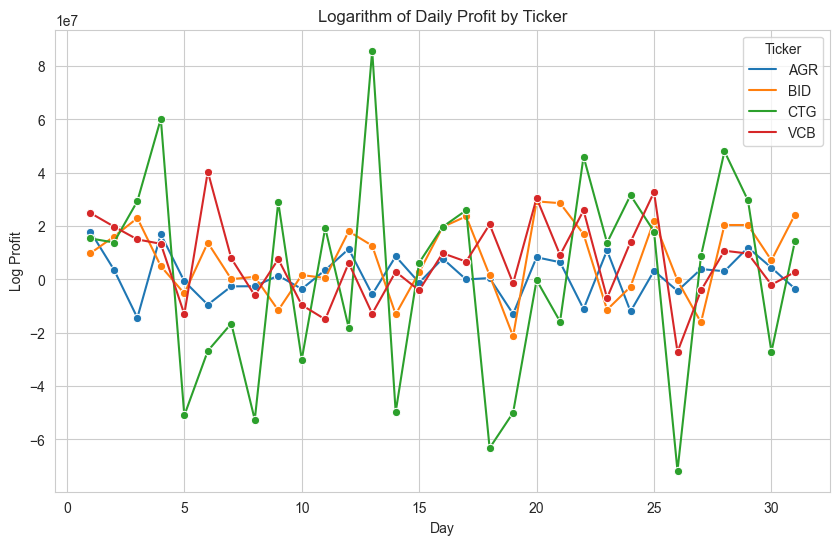

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=Daily_Profit, x='day', y='profit', hue='ticker', marker='o')

plt.title('Logarithm of Daily Profit by Ticker')
plt.xlabel('Day')
plt.ylabel('Log Profit')
plt.legend(title='Ticker')
plt.show()

**2.4. Lưu dữ liệu**

In [13]:
df.to_csv('stock_data_output/data.csv', index=False)